# Performance evaluation of Terapixel rendering in Cloud (Super)computing

In [1]:
# Importing Important Library

import re
import numpy as np
import pandas as pd
import nltk

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler

In [2]:
# Loading Data

gpu = pd.read_csv('GPU.csv')
xy = pd.read_csv('Task-x-y.csv')
ac = pd.read_csv('Application-checkpoints.csv')


In [3]:
# Shape of the data frame 

print(f"Shape of GPU : {gpu.shape}")
print(f"Shape of Task-x-y : {xy.shape}")
print(f"Shape of Application-checkpoints : {ac.shape}")

Shape of GPU : (1543681, 8)
Shape of Task-x-y : (65793, 5)
Shape of Application-checkpoints : (660400, 6)


In [4]:
# Summary structure of each column of each data frame

print(gpu.info())
print(xy.info())
print(ac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543681 entries, 0 to 1543680
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       1543681 non-null  object 
 1   hostname        1543681 non-null  object 
 2   gpuSerial       1543681 non-null  int64  
 3   gpuUUID         1543681 non-null  object 
 4   powerDrawWatt   1543681 non-null  float64
 5   gpuTempC        1543681 non-null  int64  
 6   gpuUtilPerc     1543681 non-null  int64  
 7   gpuMemUtilPerc  1543681 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 94.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65793 entries, 0 to 65792
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   taskId  65793 non-null  object
 1   jobId   65793 non-null  object
 2   x       65793 non-null  int64 
 3   y       65793 non-null  int64 
 4   level   65793 non-nul

In [5]:
print("------------ GPU ----------------")
gpu.head()

------------ GPU ----------------


,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [6]:
print("------------ task-x-y ----------------")
xy.head()

------------ task-x-y ----------------


,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [7]:
print("------------ ac ----------------")
ac.head()

------------ ac ----------------


,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


In [8]:
# Dropping NA entries.

ac.dropna(inplace=True)
xy.dropna(inplace=True)
gpu.dropna(inplace=True)

In [9]:
# Checking for any duplicate entries in the dataset for each data frames

print(f"Duplicate entried in  GPU : {gpu.duplicated().sum()}")
print(f"Duplicate entried in  Task-x-y : {xy.duplicated().sum()}")
print(f"Duplicate entried in  Application-checkpoints : {ac.duplicated().sum()}")

Duplicate entried in  GPU : 9
Duplicate entried in  Task-x-y : 0
Duplicate entried in  Application-checkpoints : 2470


In [10]:
gpu.drop_duplicates(inplace=True)
xy.drop_duplicates(inplace=True)
ac.drop_duplicates(inplace=True)

In [11]:
# Get the count of each eventName
ac.groupby(by='eventName').count().reset_index()\
[['eventName', 'jobId', 'taskId']].rename(columns={'jobId': 'JobCount'})


,eventName,JobCount,taskId
0,Render,131586,131586
1,Saving Config,131586,131586
2,Tiling,131586,131586
3,TotalRender,131586,131586
4,Uploading,131586,131586


# Removing duplicate entries

gpu.drop_duplicates(inplace=True)
xy.drop_duplicates(inplace=True)
ac.drop_duplicates(inplace=True)

## Which event types dominate task runtimes?

In [12]:
# Calculating runtime

# Filter the DataFrame for start and stop events
start_events = ac[ac['eventType'] == 'START']
stop_events = ac[ac['eventType'] == 'STOP']


In [13]:
stop_events.head(5)

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
5,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
7,2018-11-08T07:43:57.223Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71


In [14]:
# Merge start and stop events based on jobId, taskId, and condition for positive runtime

task_runtimes = start_events.merge(stop_events, on=['jobId', 'taskId', 'eventName', 'hostname'], suffixes=('_start', '_stop'))
task_runtimes = task_runtimes[task_runtimes['timestamp_stop'] > task_runtimes['timestamp_start']]

task_runtimes.head(5)

,timestamp_start,hostname,eventName,eventType_start,jobId,taskId,timestamp_stop,eventType_stop
0,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08T07:42:29.845Z,STOP
1,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08T07:43:10.965Z,STOP
2,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71,2018-11-08T07:43:57.245Z,STOP
3,2018-11-08T07:44:47.555Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e,2018-11-08T07:44:47.557Z,STOP
4,2018-11-08T07:47:38.457Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba,2018-11-08T07:47:39.357Z,STOP


In [15]:
# Calculate the runtime for each task
task_runtimes['runtime'] = pd.to_datetime(task_runtimes['timestamp_stop']) - pd.to_datetime(task_runtimes['timestamp_start'])
task_runtimes.head(10)

,timestamp_start,hostname,eventName,eventType_start,jobId,taskId,timestamp_stop,eventType_stop,runtime
0,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08T07:42:29.845Z,STOP,0 days 00:00:00.003000
1,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d,2018-11-08T07:43:10.965Z,STOP,0 days 00:00:41.120000
2,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71,2018-11-08T07:43:57.245Z,STOP,0 days 00:00:01.006000
3,2018-11-08T07:44:47.555Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e,2018-11-08T07:44:47.557Z,STOP,0 days 00:00:00.002000
4,2018-11-08T07:47:38.457Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba,2018-11-08T07:47:39.357Z,STOP,0 days 00:00:00.900000
5,2018-11-08T07:47:38.464Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba,2018-11-08T07:47:39.344Z,STOP,0 days 00:00:00.880000
6,2018-11-08T07:49:41.858Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,bce8d6bb-8cfe-475b-ae03-af28d1fac10a,2018-11-08T07:49:42.886Z,STOP,0 days 00:00:01.028000
7,2018-11-08T08:03:09.698Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,fb8b9faa-be63-426c-9742-be30e5298f5b,2018-11-08T08:03:09.701Z,STOP,0 days 00:00:00.003000
8,2018-11-08T08:03:42.209Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,fb8b9faa-be63-426c-9742-be30e5298f5b,2018-11-08T08:03:43.060Z,STOP,0 days 00:00:00.851000
9,2018-11-08T08:03:46.513Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,674ef19f-b3cb-4aa5-8980-f37cbbca324d,2018-11-08T08:03:46.515Z,STOP,0 days 00:00:00.002000


In [16]:
print(task_runtimes['runtime'].describe())

count                       328965
mean     0 days 00:00:17.236464368
std      0 days 00:00:20.572214275
min         0 days 00:00:00.002000
25%         0 days 00:00:00.902000
50%         0 days 00:00:01.066000
75%         0 days 00:00:40.736000
max         0 days 00:01:33.697000
Name: runtime, dtype: object


# Get the sum of runtime for each eventName
task_runtimes.groupby(by='eventName').sum().reset_index()\
[['eventName', 'runtime']].rename(columns={'runtime': 'Total_runtime'})


# Get the mean of runtime for each eventName
task_runtimes.groupby(by='eventName').mean().reset_index()\
[['eventName', 'runtime']].rename(columns={'runtime': 'Avg_runtime'})


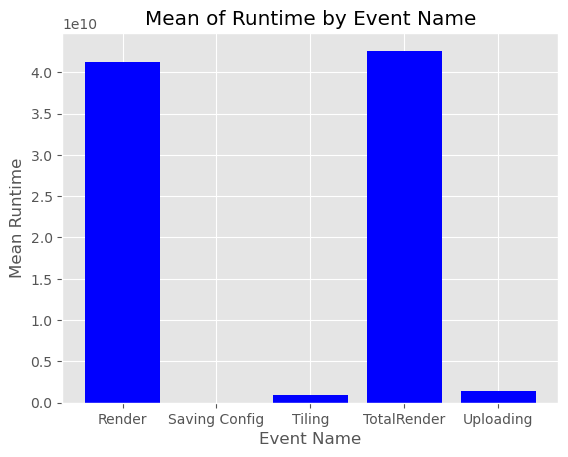

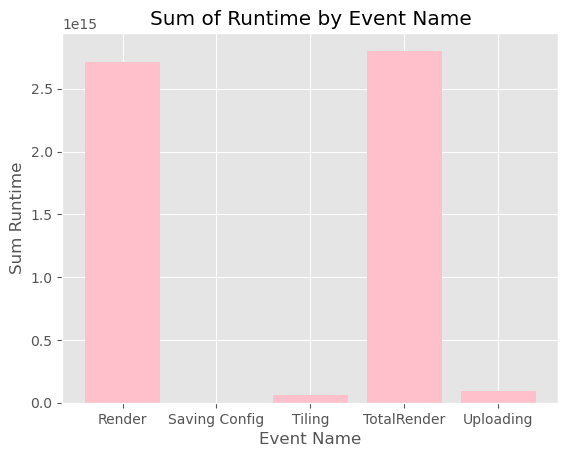

In [17]:
# Calculate the mean and sum of runtime for each eventName 
runtime_stats = task_runtimes.groupby('eventName')['runtime'].agg(['mean', 'sum'])

# Plotting the bar graph for mean values
plt.bar(runtime_stats.index, runtime_stats['mean'], color='blue')
plt.title("Mean of Runtime by Event Name")
plt.xlabel("Event Name")
plt.ylabel("Mean Runtime")
plt.show()

# Plotting the bar graph for sum values
plt.bar(runtime_stats.index, runtime_stats['sum'], color='pink')
plt.title("Sum of Runtime by Event Name")
plt.xlabel("Event Name")
plt.ylabel("Sum Runtime")
plt.show()


 So from  the above barplot it is very much clear that "Render" event dominates task runtimes.
### CONCLUSION : That means in the  overall of the total runtime i.e. Total render, "Render" gains the maximum runtimes. And thus to improve performance the focus can be done on Render stage of the event.

 So from  the above barplot it is very much clear that "Render" event dominates task runtimes.
### CONCLUSION : That means in the  overall of the total runtime i.e. Total render, "Render" gains the maximum runtimes. And thus to improve performance the focus can be done on Render stage of the event.TotalRender has the maximun runtime. but it can also indicate that 

Study the metrics in the `gpu.csv` file such as `powerDrawWatt`, `gpuTempC`, `gpuUtilPerc`, and `gpuMemUtilPerc` to understand the interplay between GPU temperature, power draw, and performance. Visualize the relationships between these variables using scatter plots or line plots

## GOAL 2 : What is the interplay between GPU temperature and performance?

In [27]:
# Convert the timestamp column to datetime data type
gpu['timestamp'] = pd.to_datetime(gpu['timestamp'])


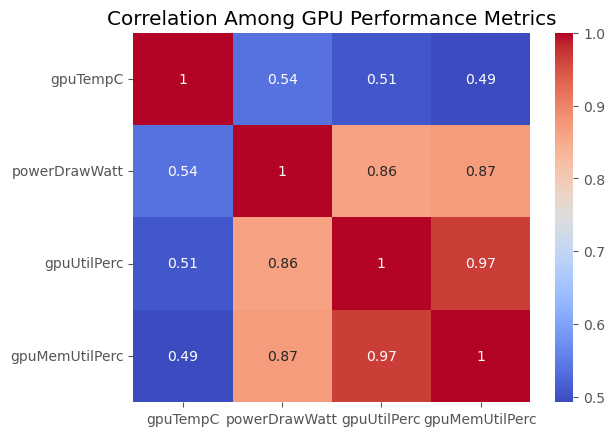

In [30]:

# Calculate the correlation matrix
corr_matrix = gpu[['gpuTempC', 'powerDrawWatt', 'gpuUtilPerc', 'gpuMemUtilPerc']].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Among GPU Performance Metrics')
plt.show()

In [ ]:

# Plot scatter plot: GPU Temperature vs Power Draw
plt.scatter(gpu['gpuTempC'], gpu['powerDrawWatt'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('Power Draw (Watt)')
plt.title('GPU Temperature vs Power Draw')
plt.show()


In [ ]:
# Plot scatter plot: GPU Temperature vs GPU Utilization
plt.scatter(gpu['gpuTempC'], gpu['gpuUtilPerc'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('GPU Utilization (%)')
plt.title('GPU Temperature vs GPU Utilization')
plt.show()

In [ ]:
# Plot scatter plot: Power Draw vs GPU Utilization
plt.scatter(gpu['powerDrawWatt'], gpu['gpuUtilPerc'])
plt.xlabel('Power Draw (Watt)')
plt.ylabel('GPU Utilization (%)')
plt.title('Power Draw vs GPU Utilization')
plt.show()

In [ ]:
# Plot line plot: GPU Memory Utilization over time
plt.plot(gpu['timestamp'], gpu['gpuMemUtilPerc'])
plt.xlabel('Timestamp')
plt.ylabel('GPU Memory Utilization (%)')
plt.title('GPU Memory Utilization over Time')
plt.xticks(rotation=45)
plt.show()

## Investigating the correlations between GPU performance metrics and task runtimes


Calculate the correlation between the GPU performance metrics (e.g., gpuTempC, gpuUtilPerc, gpuMemUtilPerc) and the task runtimes.
Visualize the correlations using a heatmap or scatter plots.

### Merge the task_runtimes with the gpu_data

In [18]:
import pandas as pd
import numpy as np

# Define the chunk size
chunk_size = 10000
gpu_data = gpu
task_runtimes['timestamp_start'] = pd.to_datetime(task_runtimes['timestamp_start'])
task_runtimes['timestamp_stop'] = pd.to_datetime(task_runtimes['timestamp_stop'])


# Split the DataFrames into chunks
# Get the unique hostnames from the task_runtimes DataFrame
unique_hostnames = task_runtimes['hostname'].unique()

# Calculate the number of chunks based on the minimum between chunk_size and the number of unique hostnames
num_chunks = min(chunk_size, len(unique_hostnames))

# Split the task_runtimes DataFrame into chunks based on hostname
task_runtimes_chunks = np.array_split(task_runtimes, num_chunks)

# Get the unique hostnames from the gpu_data DataFrame
unique_hostnames = gpu_data['hostname'].unique()

# Calculate the number of chunks based on the minimum between chunk_size and the number of unique hostnames
num_chunks = min(chunk_size, len(unique_hostnames))

# Split the gpu_data DataFrame into chunks based on hostname
gpu_data_chunks = np.array_split(gpu_data, num_chunks)

# Initialize an empty list to store the merged chunks
merged_chunks = []

# Merge the chunks iteratively
for task_chunk, gpu_chunk in zip(task_runtimes_chunks, gpu_data_chunks):
    merged_chunk = task_chunk.merge(gpu_chunk, on='hostname')
    merged_chunks.append(merged_chunk)

# Concatenate the merged chunks into a single DataFrame
merged_data = pd.concat(merged_chunks)

# Print the merged DataFrame information
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 483236 entries, 0 to 392
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   timestamp_start  483236 non-null  object         
 1   hostname         483236 non-null  object         
 2   eventName        483236 non-null  object         
 3   eventType_start  483236 non-null  object         
 4   jobId            483236 non-null  object         
 5   taskId           483236 non-null  object         
 6   timestamp_stop   483236 non-null  object         
 7   eventType_stop   483236 non-null  object         
 8   runtime          483236 non-null  timedelta64[ns]
 9   timestamp        483236 non-null  object         
 10  gpuSerial        483236 non-null  int64          
 11  gpuUUID          483236 non-null  object         
 12  powerDrawWatt    483236 non-null  float64        
 13  gpuTempC         483236 non-null  int64          
 14  gpuUtil

In [36]:
merged_data.head(4)

timestamp_start             object
hostname                    object
eventName                   object
eventType_start             object
jobId                       object
taskId                      object
timestamp_stop              object
eventType_stop              object
runtime            timedelta64[ns]
timestamp                   object
gpuSerial                    int64
gpuUUID                     object
powerDrawWatt              float64
gpuTempC                     int64
gpuUtilPerc                  int64
gpuMemUtilPerc               int64
dtype: object


,timestamp_start,hostname,eventName,eventType_start,jobId,taskId,timestamp_stop,eventType_stop,runtime,timestamp,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T07:41:31.727Z,0d56a730076643d585f77e00d2d8521a00000R,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,14ec82ff-253b-4479-bb90-a34f5a9ae957,2018-11-08T07:41:31.730Z,STOP,0 days,2018-11-08T08:27:25.714Z,325117064399,GPU-340bc638-6103-69c6-776c-cd58a3a0eca6,44.86,36,0,0


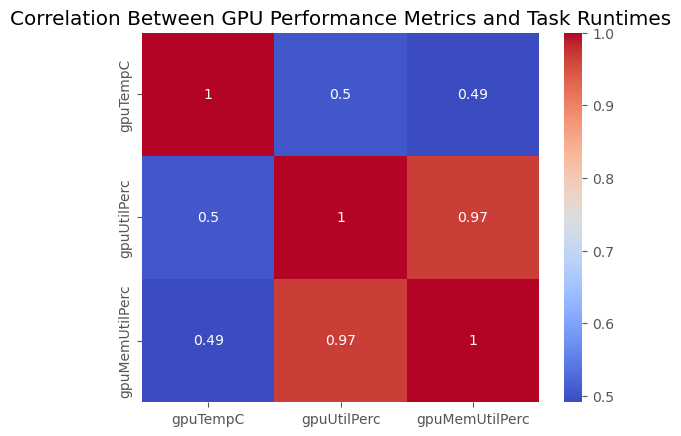

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the correlation matrix
correlation_matrix = merged_data[['runtime', 'gpuTempC', 'gpuUtilPerc', 'gpuMemUtilPerc']].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between GPU Performance Metrics and Task Runtimes')
plt.show()


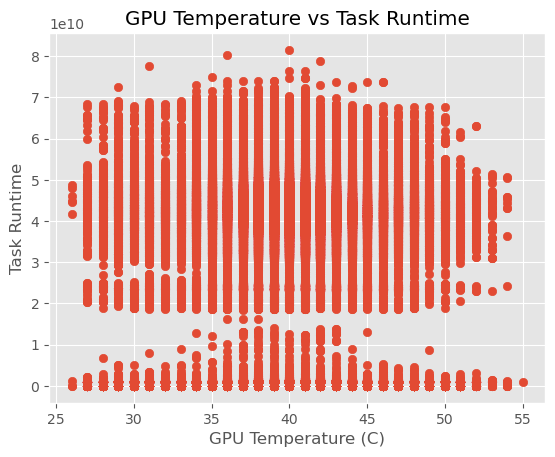

In [24]:
# Plot scatter plots to visualize individual correlations
plt.scatter(merged_data['gpuTempC'], merged_data['runtime'])
plt.xlabel('GPU Temperature (C)')
plt.ylabel('Task Runtime')
plt.title('GPU Temperature vs Task Runtime')
plt.show()

plt.scatter(merged_data['gpuUtilPerc'], merged_data['runtime'])
plt.xlabel('GPU Utilization (%)')
plt.ylabel('Task Runtime')
plt.title('GPU Utilization vs Task Runtime')
plt.show()

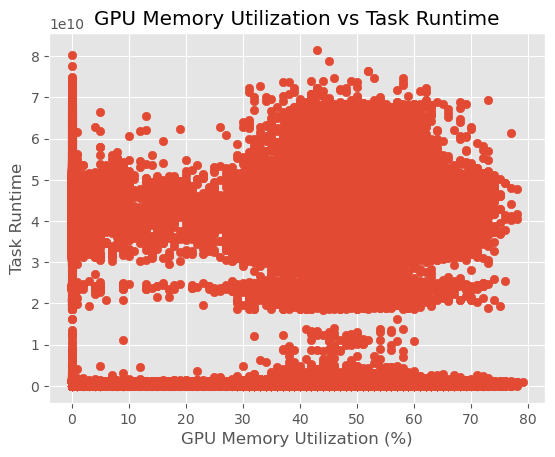

In [26]:
plt.scatter(merged_data['gpuMemUtilPerc'], merged_data['runtime'])
plt.xlabel('GPU Memory Utilization (%)')
plt.ylabel('Task Runtime')
plt.title('GPU Memory Utilization vs Task Runtime')
plt.show()

## Analyze the `task-x-y.csv` file to understand the computation requirements for specific image tiles. Look for variations in the `x` and `y` coordinates of the rendered tiles and examine how they relate to task runtimes or GPU performance.

In [56]:
#Calculating statistics of the x and y coordinates

print('Stats for X-coordinate : ')
x_stats = xy['x'].describe() 
print(x_stats)

print ("------------")
print('Stats for Y-coordinate : ')
y_stats = xy['y'].describe()
print(y_stats)


Stats for X-coordinate : 
count    65793.000000
mean       127.031143
std         74.135963
min          0.000000
25%         63.000000
50%        127.000000
75%        191.000000
max        255.000000
Name: x, dtype: float64
------------
Stats for Y-coordinate : 
count    65793.000000
mean       127.031143
std         74.135963
min          0.000000
25%         63.000000
50%        127.000000
75%        191.000000
max        255.000000
Name: y, dtype: float64


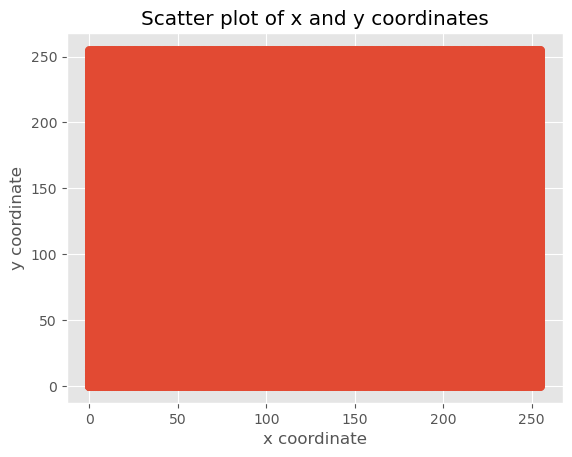

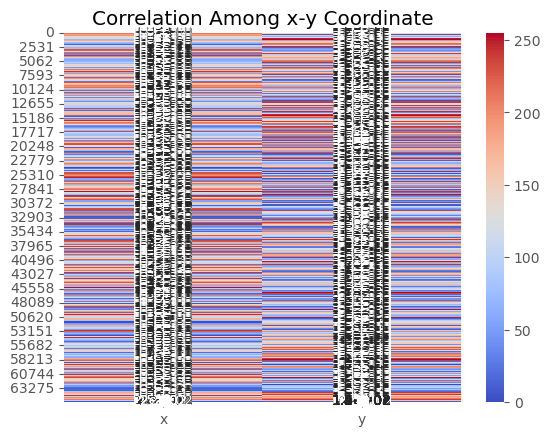

In [62]:
#Correlation of x and y

plt.scatter(xy['x'], xy['y'])
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter plot of x and y coordinates')
plt.show()

corr_xy = xy[['x','y']]
# Plot a heatmap of the correlation matrix
sns.heatmap(corr_xy, annot=True, cmap='coolwarm')
plt.title('Correlation Among x-y Coordinate')
plt.show()

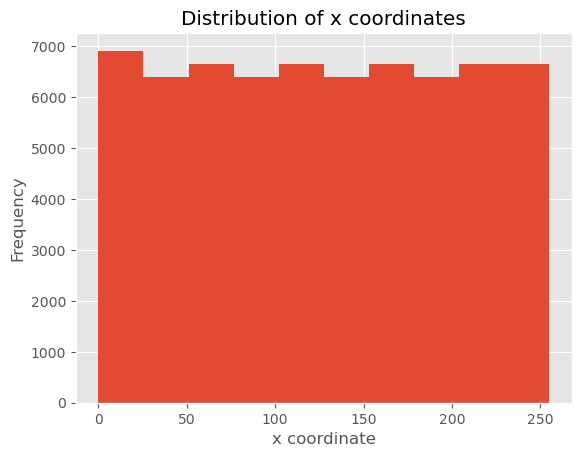

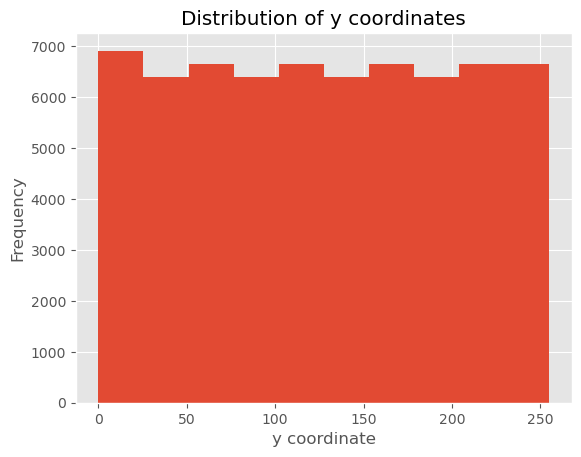

In [61]:
import matplotlib.pyplot as plt

plt.hist(xy['x'], bins=10)
plt.xlabel('x coordinate')
plt.ylabel('Frequency')
plt.title('Distribution of x coordinates')
plt.show()

plt.hist(xy['y'], bins=10)
plt.xlabel('y coordinate')
plt.ylabel('Frequency')
plt.title('Distribution of y coordinates')
plt.show()


#MERGEING TABLE (REMOVE)

In [66]:
#Merging 2 dataframes based on columns using join operation

merged_table1 = xy.merge( merged_data, on=['jobId','taskId'])

merged_table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483236 entries, 0 to 483235
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   taskId           483236 non-null  object         
 1   jobId            483236 non-null  object         
 2   x                483236 non-null  int64          
 3   y                483236 non-null  int64          
 4   level            483236 non-null  int64          
 5   timestamp_start  483236 non-null  object         
 6   hostname         483236 non-null  object         
 7   eventName        483236 non-null  object         
 8   eventType_start  483236 non-null  object         
 9   timestamp_stop   483236 non-null  object         
 10  eventType_stop   483236 non-null  object         
 11  runtime          483236 non-null  timedelta64[ns]
 12  timestamp        483236 non-null  object         
 13  gpuSerial        483236 non-null  int64          
 14  gpuU

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483236 entries, 0 to 483235
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   taskId           483236 non-null  object         
 1   jobId            483236 non-null  object         
 2   x                483236 non-null  int64          
 3   y                483236 non-null  int64          
 4   level            483236 non-null  int64          
 5   timestamp_start  483236 non-null  object         
 6   hostname         483236 non-null  object         
 7   eventName        483236 non-null  object         
 8   eventType_start  483236 non-null  object         
 9   timestamp_stop   483236 non-null  object         
 10  eventType_stop   483236 non-null  object         
 11  runtime          483236 non-null  timedelta64[ns]
 12  timestamp        483236 non-null  object         
 13  gpuSerial        483236 non-null  int64          
 14  gpuU

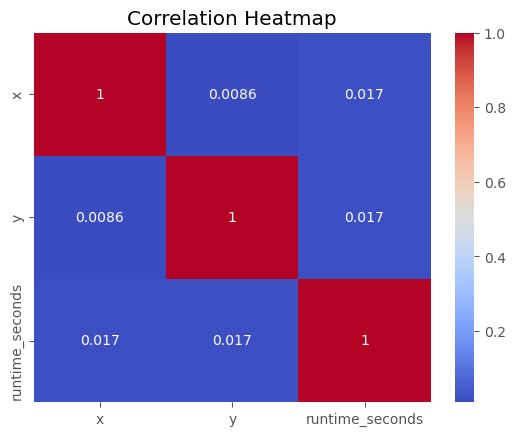

In [78]:
#Calculate correlations between x or y coordinates   corr() method

import numpy as np

merged_table1['runtime_seconds'] = merged_table1['runtime'] / np.timedelta64(1, 's')

merged_table1.info()
correlation_x_runtime = merged_table1['x'].corr(merged_table1['runtime_seconds'])
correlation_y_runtime = merged_table1['y'].corr(merged_table1['runtime_seconds'])
print('correlation of x and runtime', correlation_x_runtime)
print('correlation of y and runtime', correlation_y_runtime)

# Plot a heatmap of the correlation matrix
correlation_matrix = merged_table1[['x', 'y', 'runtime_seconds']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

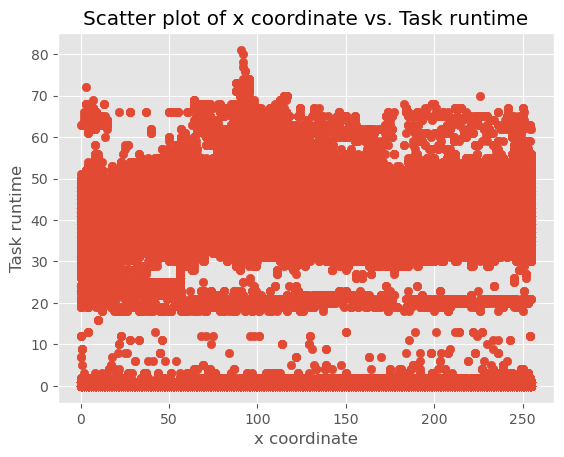

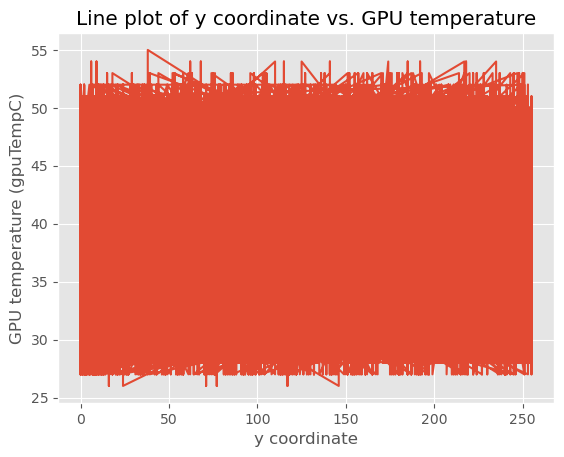

In [79]:

plt.scatter(merged_table1['x'], merged_table1['runtime'])
plt.xlabel('x coordinate')
plt.ylabel('Task runtime')
plt.title('Scatter plot of x coordinate vs. Task runtime')
plt.show()



In [ ]:
#--gptemp, gputil etc write all the plot possible

plt.plot(merged_table1['y'], merged_table1['gpuTempC'])
plt.xlabel('y coordinate')
plt.ylabel('GPU temperature (gpuTempC)')
plt.title('Line plot of y coordinate vs. GPU temperature')
plt.show()


## GOAL 4: GPU card performance:
   - Use the `gpuSerial` column in the `gpu.csv` file to identify different GPU cards. Compare the performance of different cards by analyzing metrics such as power draw, GPU temperature, and GPU utilization.


In [88]:
# Identifying the list of unique GPU cards

unique_count = len(gpu_data['gpuSerial'].unique())
unique_count1 = len(merged_table1['gpuSerial'].unique())
unique_cards = gpu_data['gpuSerial'].unique()
unique_cards1 = merged_table1['gpuSerial'].unique()

In [114]:
# To check if there is any GPU card which is not present in the GPU details 
print('Original GPU card Count : ', unique_count)
print('Original GPU card Count : ',unique_count1)

absent_elements = set(unique_cards) - set(unique_cards1)
if len(absent_elements) > 0:
    print("Elements absent in unique_cards1:", absent_elements)
else:
    print("No absent elements found in unique_cards1")    

Original GPU card Count :  1024
Original GPU card Count :  1023
Elements absent in unique_cards1: {325217086221}


In [90]:
#Calculate statistics or analyze metrics for each GPU card:

for card in unique_cards1:
    card_data = gpu_data[gpu_data['gpuSerial'] == card]
    
    # Calculate mean power draw for the card
    mean_power_draw = card_data['powerDrawWatt'].mean()
    
    # Calculate mean GPU temperature for the card
    mean_gpu_temp = card_data['gpuTempC'].mean()
    
    # Calculate mean GPU utilization for the card
    mean_gpu_utilization = card_data['gpuUtilPerc'].mean()
    
    # Perform further analysis or visualization as desired
    # ...
    
    # Print the performance metrics for the card
    print(f"GPU Card: {card}")
    print(f"Mean Power Draw: {mean_power_draw} Watts")
    print(f"Mean GPU Temperature: {mean_gpu_temp} °C")
    print(f"Mean GPU Utilization: {mean_gpu_utilization}%")
    print("----------------------------------------------")

GPU Card: 325117173029
Mean Power Draw: 95.11199866755514 Watts
Mean GPU Temperature: 46.153231179213854 °C
Mean GPU Utilization: 62.27248500999334%
----------------------------------------------
GPU Card: 323617020500
Mean Power Draw: 95.49067288474355 Watts
Mean GPU Temperature: 41.770819453697534 °C
Mean GPU Utilization: 61.53364423717522%
----------------------------------------------
GPU Card: 323617021461
Mean Power Draw: 87.0343399999999 Watts
Mean GPU Temperature: 39.59133333333333 °C
Mean GPU Utilization: 60.954%
----------------------------------------------
GPU Card: 323617042495
Mean Power Draw: 96.01738840772812 Watts
Mean GPU Temperature: 42.73151232511659 °C
Mean GPU Utilization: 61.574950033311126%
----------------------------------------------
GPU Card: 323617020564
Mean Power Draw: 89.16269153897397 Watts
Mean GPU Temperature: 44.31645569620253 °C
Mean GPU Utilization: 65.04397068620919%
----------------------------------------------
GPU Card: 325217085233
Mean Power 

GPU Card: 320118118702
Mean Power Draw: 89.74750167000663 Watts
Mean GPU Temperature: 38.79091516366066 °C
Mean GPU Utilization: 64.19839679358718%
----------------------------------------------
GPU Card: 325117172388
Mean Power Draw: 89.36040639573628 Watts
Mean GPU Temperature: 38.43904063957362 °C
Mean GPU Utilization: 63.551632245169884%
----------------------------------------------
GPU Card: 323617020662
Mean Power Draw: 85.70674217188535 Watts
Mean GPU Temperature: 39.123917388407726 °C
Mean GPU Utilization: 62.06995336442372%
----------------------------------------------
GPU Card: 325217086360
Mean Power Draw: 92.27660226515665 Watts
Mean GPU Temperature: 37.22451698867422 °C
Mean GPU Utilization: 64.13790806129248%
----------------------------------------------
GPU Card: 325217086449
Mean Power Draw: 89.65944703530995 Watts
Mean GPU Temperature: 39.49300466355763 °C
Mean GPU Utilization: 64.19853431045969%
----------------------------------------------
GPU Card: 325017017958


GPU Card: 325117063047
Mean Power Draw: 88.90187874750163 Watts
Mean GPU Temperature: 36.91872085276482 °C
Mean GPU Utilization: 66.12991339107262%
----------------------------------------------
GPU Card: 325017049041
Mean Power Draw: 99.05757495003338 Watts
Mean GPU Temperature: 43.343770819453695 °C
Mean GPU Utilization: 64.10659560293138%
----------------------------------------------
GPU Card: 323617020489
Mean Power Draw: 90.82034643570954 Watts
Mean GPU Temperature: 39.323117921385744 °C
Mean GPU Utilization: 62.04863424383744%
----------------------------------------------
GPU Card: 323617042730
Mean Power Draw: 91.90895403064636 Watts
Mean GPU Temperature: 39.986009327115255 °C
Mean GPU Utilization: 62.65356429047302%
----------------------------------------------
GPU Card: 323617021519
Mean Power Draw: 90.2024583610927 Watts
Mean GPU Temperature: 41.09526982011992 °C
Mean GPU Utilization: 61.204530313124586%
----------------------------------------------
GPU Card: 325117171440

GPU Card: 325017049097
Mean Power Draw: 88.69158560959357 Watts
Mean GPU Temperature: 37.52298467688208 °C
Mean GPU Utilization: 64.32978014656895%
----------------------------------------------
GPU Card: 324917052184
Mean Power Draw: 86.34421052631575 Watts
Mean GPU Temperature: 36.93137908061293 °C
Mean GPU Utilization: 62.20786142571619%
----------------------------------------------
GPU Card: 323617020782
Mean Power Draw: 89.35815456362427 Watts
Mean GPU Temperature: 39.94603597601599 °C
Mean GPU Utilization: 62.34243837441706%
----------------------------------------------
GPU Card: 323617021229
Mean Power Draw: 88.27799467021975 Watts
Mean GPU Temperature: 39.94070619586942 °C
Mean GPU Utilization: 64.03331112591606%
----------------------------------------------
GPU Card: 325217086244
Mean Power Draw: 90.04648234510331 Watts
Mean GPU Temperature: 38.265822784810126 °C
Mean GPU Utilization: 63.08327781479014%
----------------------------------------------
GPU Card: 325217085524
M

GPU Card: 325217085205
Mean Power Draw: 89.48147000000013 Watts
Mean GPU Temperature: 37.00033333333333 °C
Mean GPU Utilization: 64.04166666666667%
----------------------------------------------
GPU Card: 323617043049
Mean Power Draw: 88.21846102598258 Watts
Mean GPU Temperature: 41.39906728847435 °C
Mean GPU Utilization: 61.717521652231845%
----------------------------------------------
GPU Card: 323617020163
Mean Power Draw: 84.48540306462357 Watts
Mean GPU Temperature: 40.94803464357095 °C
Mean GPU Utilization: 60.13524317121919%
----------------------------------------------
GPU Card: 323617042513
Mean Power Draw: 88.89918720852747 Watts
Mean GPU Temperature: 38.67221852098601 °C
Mean GPU Utilization: 60.20253164556962%
----------------------------------------------
GPU Card: 325017017667
Mean Power Draw: 91.56658894070632 Watts
Mean GPU Temperature: 38.026648900732845 °C
Mean GPU Utilization: 63.63424383744171%
----------------------------------------------
GPU Card: 320118119725


GPU Card: 323217056532
Mean Power Draw: 91.9055066666667 Watts
Mean GPU Temperature: 42.418 °C
Mean GPU Utilization: 63.42933333333333%
----------------------------------------------
GPU Card: 323217056712
Mean Power Draw: 87.41749333333334 Watts
Mean GPU Temperature: 42.674 °C
Mean GPU Utilization: 60.76266666666667%
----------------------------------------------
GPU Card: 325117063559
Mean Power Draw: 85.29954696868745 Watts
Mean GPU Temperature: 37.66222518321119 °C
Mean GPU Utilization: 64.09726848767488%
----------------------------------------------
GPU Card: 323217055911
Mean Power Draw: 95.74948700866094 Watts
Mean GPU Temperature: 41.33044636908728 °C
Mean GPU Utilization: 64.04397068620919%
----------------------------------------------
GPU Card: 323217056308
Mean Power Draw: 88.89101932045304 Watts
Mean GPU Temperature: 40.17255163224517 °C
Mean GPU Utilization: 64.86342438374417%
----------------------------------------------
GPU Card: 325017019805
Mean Power Draw: 88.57131

GPU Card: 323617021075
Mean Power Draw: 83.8195069953364 Watts
Mean GPU Temperature: 40.11792138574284 °C
Mean GPU Utilization: 60.94403730846103%
----------------------------------------------
GPU Card: 323617043082
Mean Power Draw: 86.68193870752833 Watts
Mean GPU Temperature: 43.68221185876082 °C
Mean GPU Utilization: 61.11858760826116%
----------------------------------------------
GPU Card: 324917052410
Mean Power Draw: 88.57347768154565 Watts
Mean GPU Temperature: 37.303131245836106 °C
Mean GPU Utilization: 62.37441705529647%
----------------------------------------------
GPU Card: 323217056465
Mean Power Draw: 88.57964690206526 Watts
Mean GPU Temperature: 41.29313790806129 °C
Mean GPU Utilization: 61.676882078614256%
----------------------------------------------
GPU Card: 323617020840
Mean Power Draw: 91.07078104138856 Watts
Mean GPU Temperature: 46.06275033377837 °C
Mean GPU Utilization: 59.46461949265687%
----------------------------------------------
GPU Card: 323217056163
M

GPU Card: 325217086429
Mean Power Draw: 87.69956666666668 Watts
Mean GPU Temperature: 37.47 °C
Mean GPU Utilization: 60.721333333333334%
----------------------------------------------
GPU Card: 325217085942
Mean Power Draw: 95.56535738142945 Watts
Mean GPU Temperature: 41.24782899131596 °C
Mean GPU Utilization: 64.15564462257849%
----------------------------------------------
GPU Card: 323617020705
Mean Power Draw: 87.71818121252494 Watts
Mean GPU Temperature: 40.22251832111925 °C
Mean GPU Utilization: 62.72418387741506%
----------------------------------------------
GPU Card: 325117172870
Mean Power Draw: 88.9171685542971 Watts
Mean GPU Temperature: 38.542971352431714 °C
Mean GPU Utilization: 61.844103930712855%
----------------------------------------------
GPU Card: 325217085058
Mean Power Draw: 93.94388407728178 Watts
Mean GPU Temperature: 41.66688874083944 °C
Mean GPU Utilization: 64.81878747501665%
----------------------------------------------
GPU Card: 325017049043
Mean Power D

GPU Card: 325017048809
Mean Power Draw: 84.89105929380412 Watts
Mean GPU Temperature: 37.87541638907395 °C
Mean GPU Utilization: 65.07594936708861%
----------------------------------------------
GPU Card: 323617043161
Mean Power Draw: 85.36832111925374 Watts
Mean GPU Temperature: 38.60226515656229 °C
Mean GPU Utilization: 62.0599600266489%
----------------------------------------------
GPU Card: 323617020517
Mean Power Draw: 92.82285809460353 Watts
Mean GPU Temperature: 40.08594270486343 °C
Mean GPU Utilization: 60.860093271152564%
----------------------------------------------
GPU Card: 325117064788
Mean Power Draw: 89.26087275149905 Watts
Mean GPU Temperature: 40.537641572285146 °C
Mean GPU Utilization: 62.13124583610926%
----------------------------------------------
GPU Card: 325117172395
Mean Power Draw: 91.0824866666667 Watts
Mean GPU Temperature: 36.559333333333335 °C
Mean GPU Utilization: 64.69866666666667%
----------------------------------------------
GPU Card: 325117063265
M

In [113]:
# Calculate overall low performing GPU CARDS based on power draw, GPU temperature, and GPU utilization
overall_mean_power_draw = merged_table1['powerDrawWatt'].mean()
overall_mean_gpu_temp = merged_table1['gpuTempC'].mean()
overall_mean_gpu_utilization = merged_table1['gpuUtilPerc'].mean()

# Lists to store GPU cards that satisfy all three categories and two categories
cards_satisfying_three = []
cards_util_temp = []
cards_util_power = []
cards_temp_power = []
cards_just_util = []
cards_just_temp = []
cards_just_power = []

# Identify cards with significantly low performance
for card in unique_cards1:
    card_data = merged_table1[merged_table1['gpuSerial'] == card]

    # Calculate mean power draw for the card
    mean_power_draw = card_data['powerDrawWatt'].mean()

    # Calculate mean GPU temperature for the card
    mean_gpu_temp = card_data['gpuTempC'].mean()

    # Calculate mean GPU utilization for the card
    mean_gpu_utilization = card_data['gpuUtilPerc'].mean()

    # Compare the performance metrics of the card with overall statistics

    # Low performance if power draw is high, GPU temperature is high, and GPU utilization is low compared to the average
    if mean_power_draw > overall_mean_power_draw and mean_gpu_temp > overall_mean_gpu_temp and mean_gpu_utilization < overall_mean_gpu_utilization:
        cards_satisfying_three.append(card)
    else:
        # Low performance if power draw is high and GPU temperature is high compared to the average
        if mean_power_draw > overall_mean_power_draw and mean_gpu_temp > overall_mean_gpu_temp:
            cards_util_temp.append(card)
        # Low performance if power draw is high and GPU utilization is low compared to the average
        elif mean_power_draw > overall_mean_power_draw and mean_gpu_utilization < overall_mean_gpu_utilization:
            cards_util_power.append(card)
        # Low performance if GPU temperature is high and GPU utilization is low compared to the average
        elif mean_gpu_temp > overall_mean_gpu_temp and mean_gpu_utilization < overall_mean_gpu_utilization:
            cards_temp_power.append(card)
        else:
            # Low performance if GPU utilization is low compared to the average
            if mean_gpu_utilization < overall_mean_gpu_utilization:
                cards_just_util.append(card)
            # Low performance if GPU temperature is high compared to the average
            elif mean_gpu_temp > overall_mean_gpu_temp:
                cards_just_temp.append(card)
            # Low performance if power draw is high compared to the average
            elif mean_power_draw > overall_mean_power_draw:
                cards_just_power.append(card)

# Print the GPU cards satisfying all three categories
print("Low Performing GPU Cards in Three Categories (Power Draw, GPU temperature, and GPU utilization):")
print(cards_satisfying_three, "[Count:", len(cards_satisfying_three), "]")
print("                                  ")
print("                                  ")

# Print the GPU cards satisfying two categories
print("Low Performing GPU Cards in GPU utilization and GPU temperature:")
print(cards_util_temp, "[Count:", len(cards_util_temp), "]")
print("                                  ")

print("Low Performing GPU Cards in GPU utilization and Power Drawn:")
print(cards_util_power, "[Count:", len(cards_util_power), "]")
print("                                  ")

print("Low Performing GPU Cards in GPU temperature and Power Drawn:")
print(cards_temp_power, "[Count:", len(cards_temp_power), "]")
print("                                  ")
print("                                  ")

# Print the GPU cards satisfying one category
print("Low Performing GPU Cards in GPU utilization:")
print(cards_just_util, "[Count:", len(cards_just_util), "]")
print("                                  ")

print("Low Performing GPU Cards in GPU temperature:")
print(cards_just_temp, "[Count:", len(cards_just_temp), "]")
print("                                  ")

print("Low Performing GPU Cards in Power Drawn:")
print(cards_just_power, "[Count:", len(cards_just_power), "]")
print("                                  ")

Low Performing GPU Cards in Three Categories (Power Draw, GPU temperature, and GPU utilization):
[323617020500, 323617042495, 325217085233, 323617020540, 323217056666, 323617020501, 325117171602, 323617020555, 325017019989, 323617042624, 323217056366, 323217048809, 323217055910, 323217056029, 323217056415, 323217056654, 323617042920, 323217056678, 323617042603, 323617042726, 325117172104, 323617021519, 323217056248, 323617020152, 323617042622, 323217055992, 323617020099, 323617021102, 323617042596, 323617042810, 323217056004, 324917147027, 323217056233, 323617042861, 323217056551, 323617020148, 323617020425, 323217056453, 323617042764, 323617042479, 323617020414, 323617042580, 323617021540, 323617021208, 323617021428, 323617020608, 323217055753, 323217056421, 323217056202, 323617021570, 323617020132, 323617021014, 323617021486, 323617020146, 323617020436, 323217056205, 324917053014, 323617042673, 323617042614, 323617043031, 323617042519, 325017018065, 323217056214, 323217056562, 323617

## GOAL 5: Efficiency of the task scheduling process

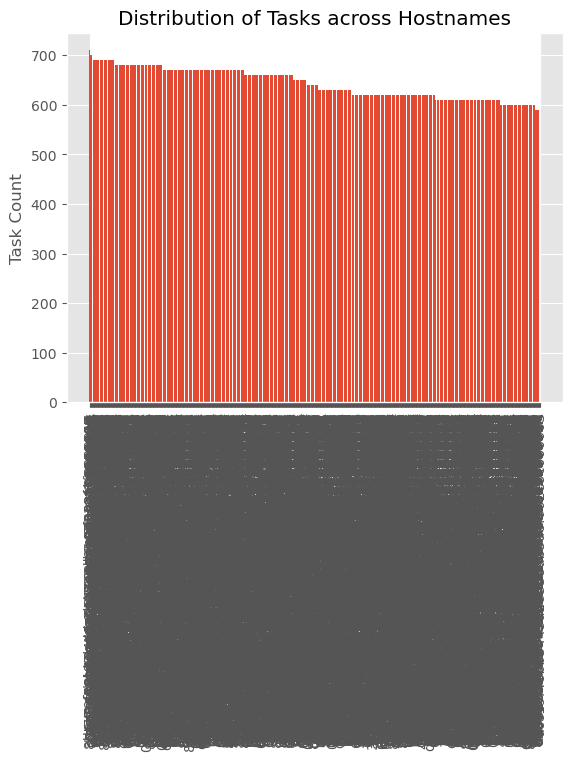

In [121]:
#count the occurrences of each hostname
hostname_counts = ac['hostname'].value_counts()

#bar graph to visualize the distribution of tasks across hostnames

plt.bar(hostname_counts.index, hostname_counts.values)
plt.title('Distribution of Tasks across Hostnames')

plt.ylabel('Task Count')
plt.xticks(rotation=90)
plt.show()


/var/folders/50/bwnknb495bn9xjf36lgd79h00000gn/T/ipykernel_65177/2014177820.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = kde.gaussian_kde(hostname_counts.values)


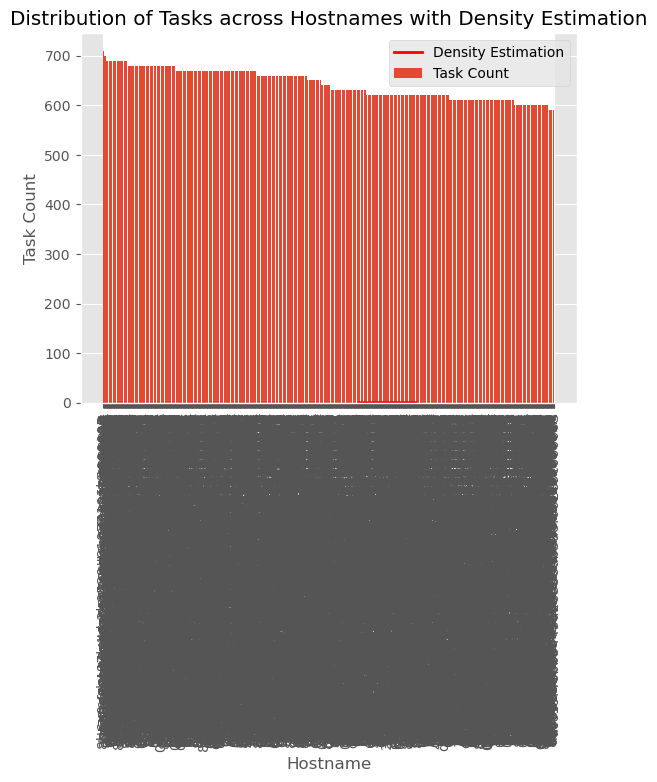

In [119]:
from scipy.stats import kde

# Create the kernel density estimation (KDE)
kde = kde.gaussian_kde(hostname_counts.values)

# Generate the x-values for evaluation
x = np.linspace(min(hostname_counts.values), max(hostname_counts.values), 100)

# Evaluate the density estimation curve
y = kde(x)

# Plot the histogram
plt.bar(hostname_counts.index, hostname_counts.values, label='Task Count')

# Plot the fitted density estimation curve
plt.plot(x, y, 'r', linewidth=2, label='Density Estimation')

plt.title('Distribution of Tasks across Hostnames with Density Estimation')
plt.xlabel('Hostname')
plt.ylabel('Task Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()
